# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cast_main = pd.read_csv("../data/cast.csv")
release_main = pd.read_csv("../data/release_dates.csv")
title_main = pd.read_csv("../data/titles.csv")

In [4]:
cast = cast_main[cast_main['year'] <= 2024]
release = release_main[release_main['year'] <= 2024]
title = title_main[title_main['year'] <= 2024]

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [5]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [6]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [7]:
title.head(5)

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [8]:
cast.shape

(3442890, 6)

In [9]:
release.shape

(443484, 4)

In [10]:
title.shape

(226010, 2)

In [11]:
cast.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

In [12]:
release.dtypes

title      object
year        int64
country    object
date       object
dtype: object

In [13]:
title.dtypes

title    object
year      int64
dtype: object

In [14]:
cast.describe()

,year,n
count,3.442890e+06,2.115119e+06
mean,1.987597e+03,1.673178e+01
std,2.837586e+01,3.209100e+01
min,1.894000e+03,1.000000e+00
25%,1.967000e+03,5.000000e+00
50%,1.999000e+03,1.000000e+01
75%,2.011000e+03,2.100000e+01
max,2.024000e+03,3.361300e+04


In [15]:
release.describe()

,year
count,443484.000000
mean,1985.554482
std,28.373156
min,1894.000000
25%,1964.000000
50%,1997.000000
75%,2010.000000
max,2024.000000


In [16]:
title.describe()

,year
count,226010.000000
mean,1985.280364
std,29.814966
min,1894.000000
25%,1965.000000
50%,1994.000000
75%,2011.000000
max,2024.000000


In [17]:
cast.info()
#The cast data frame is made up of 3,442,890 records. 
#There are 6 columns; title, name, type, and character columns with an object data type, 
#year with an int data type, and n with a float data type

<class 'pandas.core.frame.DataFrame'>
Index: 3442890 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 183.9+ MB


In [18]:
release.info()
#The release data frame is made up of 443,484 records. 
#There are 4 columns; title, country, and date columns with an object data type, 
#year with an int data type

<class 'pandas.core.frame.DataFrame'>
Index: 443484 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443483 non-null  object
 1   year     443484 non-null  int64 
 2   country  443484 non-null  object
 3   date     443484 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [19]:
title.info()
#The title data frame is made up of 226,010 records. 
#There are 2 columns; title column with an object data type, and 
#year with an int data type

<class 'pandas.core.frame.DataFrame'>
Index: 226010 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226009 non-null  object
 1   year    226010 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ MB


### 2. How many movies have the title North by Northwest

In [20]:
title[title['title'].str.contains('North by Northwest', na = False)]
#Only one movie

,title,year
201761,North by Northwest,1959


In [21]:
title[title['title'].str.contains('North by Northwest', na = False)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 201761 to 201761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1 non-null      object
 1   year    1 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ bytes


### 3. How many version of Hamlet are there, when was the first made? the last?

In [22]:
title[title['title'].str.strip() == 'Hamlet'].sort_values(by='year')
#There are 20 versions, and the first one was made in 1910

,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
221419,Hamlet,1921
221201,Hamlet,1948
220568,Hamlet,1954
113670,Hamlet,1964
73929,Hamlet,1969
204180,Hamlet,1973
64116,Hamlet,1976


In [23]:
title[title['title'].str.strip() == 'Hamlet'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 25028 to 221419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20 non-null     object
 1   year    20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


### 4. List all the movies called Treasure Island from oldest to newest

In [24]:
title[title['title'].str.strip() == 'Treasure Island'].sort_values(by='year')


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


In [25]:
title[title['title'] == 'Treasure Island'].sort_values(by='year')


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [26]:
title[title['year'] == 1950].shape[0]

1109

In [27]:
title[title['year'] == 1980].shape[0]

1750

In [28]:
title[title['year'] == 2000].shape[0]

2568

In [ ]:
#More movies were made per year as the years progressed

### 6. How big was the cast of Metropolis


In [29]:
cast[cast['title'].str.strip() == 'Metropolis'].shape[0]
#There were 33 cast members in Metropolis

33

### 7. How many roles for actors were there 1950's? 1990's

In [30]:
cast[(cast['type'] == 'actor') & (cast['year'] >= 1950) & (cast['year'] < 1960)].shape[0]
#There were 153,559 roles for actors in the 1950s

153559

In [31]:
cast[(cast['type'] == 'actor') & (cast['year'] >= 1990) & (cast['year'] < 2000)].shape[0]
#There were 245,713 roles for actors in the 1990s

245713

### 8. How many roles for actors & actresses over time? Output should be a line graph

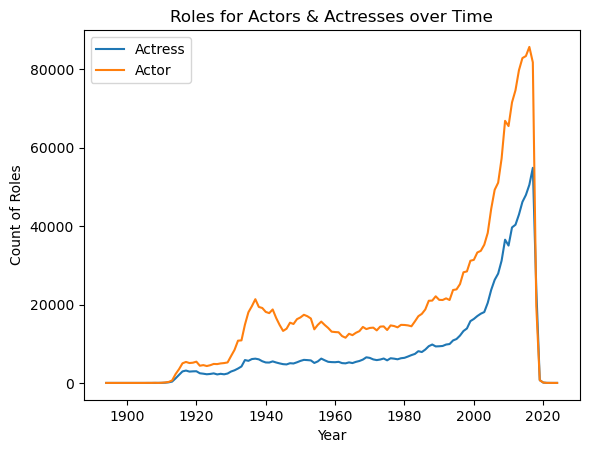

In [32]:
df = cast[cast['type'] == 'actress']
actress = df.groupby('year')['type'].count()

df2 = cast[cast['type'] == 'actor']
actor = df2.groupby('year')['type'].count()

actress.plot(kind='line', label='Actress')
actor.plot(kind='line', label='Actor')

plt.xlabel('Year')
plt.ylabel('Count of Roles')
plt.title('Roles for Actors & Actresses over Time')

plt.legend()
plt.show;

### 9. How many "leading roles" were there in the 2000's?

In [33]:
cast[(cast['n'] == 1.0) & (cast['year'] >= 2000) & (cast['year'] < 2010)].shape[0]
#There were 23,593 leading roles in the 2000s

23593

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [34]:
cast[(pd.isna(cast['n'])) & (cast['year'] >= 2000) & (cast['year'] < 2010)].shape[0]
#There were 232,037 role without ranking in the 2000s

232037

In [35]:
cast[(pd.isna(cast['n'])) & (cast['year'] >= 1950) & (cast['year'] < 1960)].shape[0]
#There were 95,406 role without ranking in the 1950s

#More roles were being ranked as the years progressed, and also indicative of more movies being made as the years progressed

95406

### 11. Plot the number of films made in each decade

In [36]:
title['decades'] = (title['year'] // 10) * 10
title

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_29692\2125063574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title['decades'] = (title['year'] // 10) * 10


,title,year,decades
0,Ankara ekspresi,1952,1950
1,"Ans Vaterland, ans teure",1915,1910
2,Miss Mohini,2002,2000
3,La vera madre,1999,1990
4,O Amerikanos,1993,1990
...,...,...,...
226008,Armageddon,1969,1960
226009,Verit i znat,1986,1980
226010,Muukalainen,2008,2000
226011,Byeolmyeongbuteun unjeonsa,1977,1970


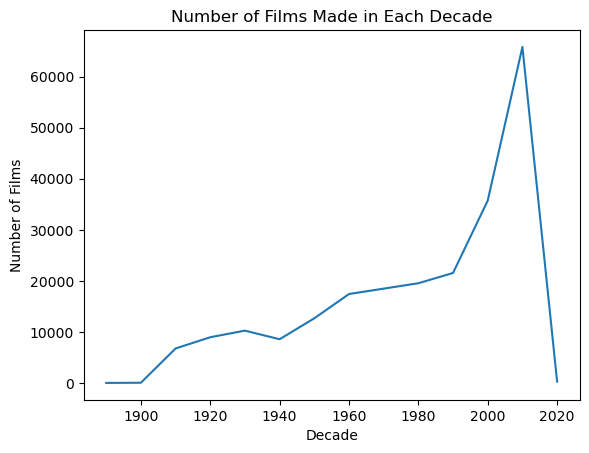

In [37]:
films = title.groupby('decades').size()

films.plot(kind='line')

plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.title('Number of Films Made in Each Decade')

plt.show;

### 12. Plot the number of films with a Rustler character over time

In [38]:
df = cast[cast['character'] == 'Rustler']
df

,title,year,name,type,character,n
12320,Pinto Canyon,1940,Victor Adamson,actor,Rustler,NaN
12451,Two Gun Troubador,1939,Victor Adamson,actor,Rustler,NaN
41718,The Last Stand,1938,Gene Alsace,actor,Rustler,NaN
71910,Wanted,1967,Bruno Ariè,actor,Rustler,NaN
89234,Silent Valley,1935,Jimmy Aubrey,actor,Rustler,NaN
...,...,...,...,...,...,...
2228961,The Mysterious Avenger,1936,Blackie Whiteford,actor,Rustler,NaN
2229544,The Marksman,1953,Russ Whiteman,actor,Rustler,9.0
2248163,The Cowboys,1972,Henry Wills,actor,Rustler,42.0
2268850,The Frontiersmen,1938,Bob (II) Woodward,actor,Rustler,NaN


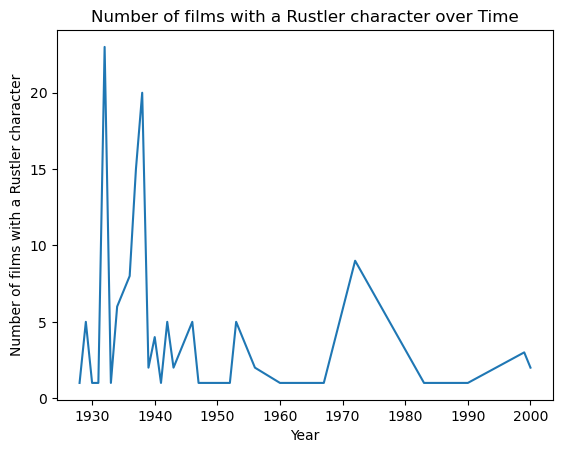

In [39]:
char = df.groupby('year')['character'].count()

char.plot(kind='line')


plt.xlabel('Year')
plt.ylabel('Number of films with a Rustler character')
plt.title('Number of films with a Rustler character over Time')

plt.show;

### 13. What are the top ten character names of all time?

In [40]:
top_char = cast['character'].value_counts().head(10)
top_char

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64

### 14. Which actor appeared in the most films in the 1990's decade?

In [41]:
top_actor = cast[(cast['year'] >= 1990) & (cast['year'] < 2000)]
top_actor[top_actor['type'] == 'actor']['name'].value_counts().head(1)

name
Shakti Kapoor    143
Name: count, dtype: int64

### 15. What are the top 10 roles that start with Science?

In [42]:
sc_film = cast[cast['character'].str.startswith('Science', na = False)]
sc_film['character'].value_counts().head(10)

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64

### 16. What film has the largest cast

In [43]:
cast.groupby('title')['title'].value_counts().idxmax()
#['character'].value_counts()

'Around the World in 80 Days'

In [44]:
cast['title'].value_counts().head(1)

title
Around the World in 80 Days    1364
Name: count, dtype: int64

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [46]:
cast['title'].value_counts().describe()
#This shows the total count of films being 168,252.
#It provides statistics on the count of roles in each film 
#PS: Each row of the data is a cast/character of a film, 
#thus count of the titles still provides a count of the cast in the film
#The average number of cast per film is 20 (rounded).

count    168252.000000
mean         20.462663
std          24.206753
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: count, dtype: float64

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [47]:
Nat_film = cast[(cast['name'] == 'Natalie Portman')]
Nat_film.groupby('year')['year'].value_counts()

year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
Name: count, dtype: int64

### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [48]:
top_Nat = Nat_film[Nat_film['n'] == 1.0]
top_Nat.groupby('year')['year'].value_counts()

year
2000    1
2005    2
2008    1
2009    1
2010    2
2011    1
2015    2
2016    2
Name: count, dtype: int64

### 20. Determine how many roles for actor or actress by decade. Plot the output 

In [49]:
cast['decades'] = (cast['year'] // 10) * 10
cast

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_29692\3962528707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast['decades'] = (cast['year'] // 10) * 10


,title,year,name,type,character,n,decades
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


In [50]:
actor = cast[cast['type'] == 'actor']
actor_role_count = actor.groupby('decades').size()
actor_role_count
#['title'].value_counts()
#actor['title'].value_counts()

decades
1890         2
1900        54
1910     27396
1920     48112
1930    149272
1940    159799
1950    153559
1960    128132
1970    142015
1980    177064
1990    245713
2000    440810
2010    645548
2020       129
dtype: int64

In [51]:
actress = cast[cast['type'] == 'actress']
actress_role_count = actress.groupby('decades').size()
actress_role_count

decades
1890         1
1900        16
1910     15733
1920     23826
1930     49298
1940     50871
1950     56331
1960     54484
1970     60977
1980     80619
1990    115505
2000    235217
2010    382288
2020       119
dtype: int64

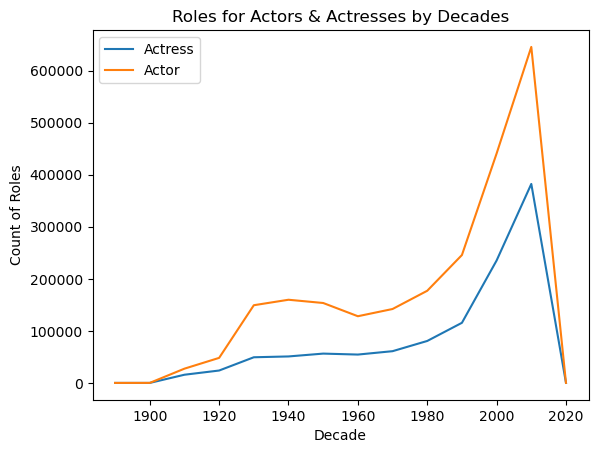

In [52]:
actress_role_count.plot(kind='line', label='Actress')
actor_role_count.plot(kind='line', label='Actor')

plt.xlabel('Decade')
plt.ylabel('Count of Roles')
plt.title('Roles for Actors & Actresses by Decades')

plt.legend()
plt.show;

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [53]:
release['date'] = pd.to_datetime(release['date'])
release

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_29692\3161827381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release['date'] = pd.to_datetime(release['date'])


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
...,...,...,...,...
443481,xXx: State of the Union,2005,Uruguay,2005-04-29
443482,xXx: State of the Union,2005,Poland,2005-06-03
443483,xXx: State of the Union,2005,Turkey,2005-06-03
443484,xXx: State of the Union,2005,China,2005-06-17


In [54]:
release['day'] = release['date'].dt.day_name() 
release

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_29692\173006756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release['day'] = release['date'].dt.day_name()


,title,year,country,date,day
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Friday
1,#BKKY,2016,Cambodia,2017-10-12,Thursday
2,#Beings,2015,Romania,2015-01-29,Thursday
3,#Captured,2017,USA,2017-09-05,Tuesday
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,Wednesday
...,...,...,...,...,...
443481,xXx: State of the Union,2005,Uruguay,2005-04-29,Friday
443482,xXx: State of the Union,2005,Poland,2005-06-03,Friday
443483,xXx: State of the Union,2005,Turkey,2005-06-03,Friday
443484,xXx: State of the Union,2005,China,2005-06-17,Friday


In [55]:
release['month'] = release['date'].dt.month_name() 
release

C:\Users\Nhyira\AppData\Local\Temp\ipykernel_29692\1242607512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  release['month'] = release['date'].dt.month_name()


,title,year,country,date,day,month
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15,Friday,June
1,#BKKY,2016,Cambodia,2017-10-12,Thursday,October
2,#Beings,2015,Romania,2015-01-29,Thursday,January
3,#Captured,2017,USA,2017-09-05,Tuesday,September
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21,Wednesday,January
...,...,...,...,...,...,...
443481,xXx: State of the Union,2005,Uruguay,2005-04-29,Friday,April
443482,xXx: State of the Union,2005,Poland,2005-06-03,Friday,June
443483,xXx: State of the Union,2005,Turkey,2005-06-03,Friday,June
443484,xXx: State of the Union,2005,China,2005-06-17,Friday,June


In [56]:
day_pivot = pd.pivot_table(release, index=['day'], aggfunc='size')
day_pivot

day
Friday       163173
Monday        37209
Saturday      31332
Sunday        15823
Thursday     125746
Tuesday       16762
Wednesday     53439
dtype: int64

In [57]:
month_pivot = pd.pivot_table(release, index=['month'], aggfunc='size')
month_pivot

month
April        37674
August       35011
December     39095
February     36307
January      39412
July         31421
June         32704
March        40257
May          35449
November     38200
October      40204
September    37750
dtype: int64

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

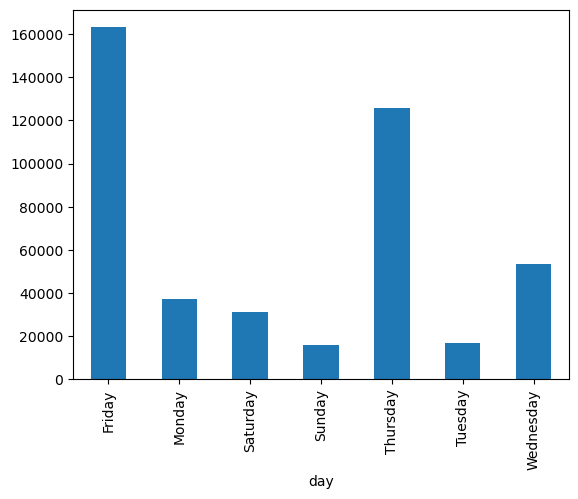

In [58]:
day_pivot.plot(kind='bar')
plt.show;

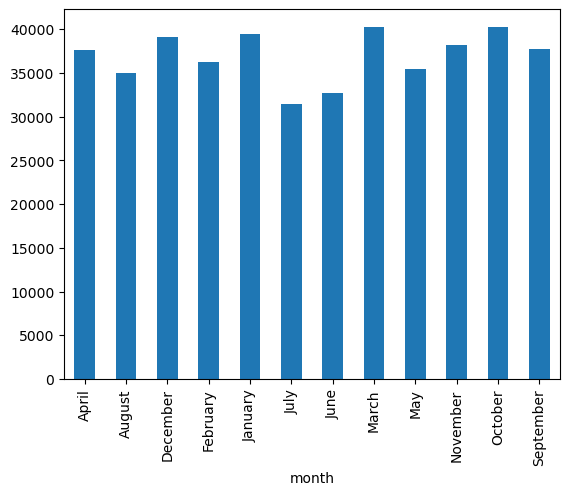

In [59]:
month_pivot.plot(kind='bar')
plt.show;

### 23. What films did actors in Star Wars go on to appear in? 

In [60]:
star = cast[(cast['title'] == 'Star Wars') & (cast['type'] == 'actor')]
star

,title,year,name,type,character,n,decades
59909,Star Wars,1977,David Ankrum,actor,Red Two,NaN,1970
82411,Star Wars,1977,Graham Ashley,actor,Gold Five,23.0,1970
91760,Star Wars,1977,Mark Anthony Austin,actor,Boba Fett (special edition),NaN,1970
110035,Star Wars,1977,Kenny Baker,actor,R2-D2,7.0,1970
145346,Star Wars,1977,Scott Beach,actor,Stormtrooper,NaN,1970
...,...,...,...,...,...,...,...
2211132,Star Wars,1977,Harold Weed,actor,Ketwol,NaN,1970
2211133,Star Wars,1977,Harold Weed,actor,Melas,NaN,1970
2222386,Star Wars,1977,Bill Weston,actor,Stormtrooper,NaN,1970
2245262,Star Wars,1977,Steve 'Spaz' Williams,actor,Mos Eisley Citizen (special edition),NaN,1970


In [61]:
actors = star['name'].unique()

In [ ]:
for name in actors:
    other_roles = cast[(cast['name'] == name) & (cast['year']>1977)]
    print(f"Actor: {name}")
    print("Films:")
    
    for index, row in other_roles.iterrows():
        print(f"- {row['title']} ({row['character']})")
            #row['title'])
#other_roles

Actor: David Ankrum
Films:
- Rogue One (Wedge Antilles)
- Smorgasbord (Bellboy)
- The Sting II (Waiter)
Actor: Graham Ashley
Films:
- Adventures of a Plumber's Mate (1st Thief)
- Licensed to Love and Kill (Commander)
Actor: Mark Anthony Austin
Films:
Actor: Kenny Baker
Films:
- 24 Hour Party People (Zookeeper)
- Amadeus (Parody Commendatore)
- Flash Gordon (Dwarf)
- Labyrinth (Goblin Corps)
- Mona Lisa (Brighton Busker)
- Sleeping Beauty (Elf)
- Star Wars: Episode I - The Phantom Menace (R2-D2)
- Star Wars: Episode II - Attack of the Clones (R2-D2)
- Star Wars: Episode III - Revenge of the Sith (R2-D2)
- Star Wars: Episode V - The Empire Strikes Back (R2-D2)
- Star Wars: Episode VI - Return of the Jedi (R2-D2)
- Star Wars: Episode VI - Return of the Jedi (Paploo)
- The Elephant Man (Plumed Dwarf)
- The King and I (Captain Orton)
- Time Bandits (Fidgit)
- U.F.O. (Casanova)
- Willow (Nelwyn Band Member)
- Wombling Free (Bungo)
Actor: Scott Beach
Films:
- Bon Voyage, Charlie Brown (and Do

Actor: Nelson Hall
Films:
- Star Wars: Episode VI - Return of the Jedi (Doda Bodonawieedo)
- Star Wars: Episode VI - Return of the Jedi (Boba Fett (special edition))
Actor: Mark Hamill
Films:
- Back to the Sea (Bunker)
- Batman: Mask of the Phantasm (The Joker)
- Batman: The Killing Joke (The Joker)
- Brigsby Bear (Ted Mitchum)
- Britannia Hospital (Red: The Media)
- Bunyan and Babe (Grandpa)
- Con Man (Robert Minkow)
- Corvette Summer (Kenneth W. Dantley Jr.)
- Guyver (Max Reed)
- Hamilton (Hawkins)
- Howard Lovecraft & the Undersea Kingdom (Dr. Henry Armitage)
- Jay and Silent Bob Strike Back (Cocknocker)
- Kaze no tani no Naushika (Mayor of Pejite)
- Kingsman: The Secret Service (Professor Arnold)
- La chute des aigles (Peter Froehlich)
- Laserhawk (Bob Sheridan)
- Quantum Quest: A Cassini Space Odyssey (Void)
- Reeseville (Zeek Oakman)
- Repetition (II) (Himself)
- Robotech: The Shadow Chronicles (Commander Taylor)
- Robotech: The Shadow Chronicles (Haydonite)
- Silk Degrees (Johns

Actor: Alf Mangan
Films:
- Arabian Adventure (Sulan: Mauve Gang)
- Dragonslayer (Urlander)
Actor: Peter (II) Mayhew
Films:
- Fanboys (Himself)
- Star Wars: Episode III - Revenge of the Sith (Chewbacca)
- Star Wars: Episode V - The Empire Strikes Back (Chewbacca)
- Star Wars: Episode VI - Return of the Jedi (Chewbacca)
- Star Wars: Episode VII - The Force Awakens (Chewbacca)
- Yesterday Was a Lie (Dead Man)
Actor: Rick McCallum
Films:
- Star Wars: Episode I - The Phantom Menace (Naboo Courier)
Actor: Alex McCrindle
Films:
- Comrades (Jailor)
- Eye of the Needle (Tom)
- The Peregrine Hunters (Hawkeye Brown)
Actor: Grant McCune
Films:
